# Extraccion y Preprocesamiento de datos en un PDF

## Paquetes requeridos
- !apt-get install ghostscript
- !pip install camelot-py[base]
- !pip install camelot-py[cv] -q
- !pip install PyPDF2<3.0

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import camelot

In [2]:
archivo = 'file:///C:/Users/medin/OneDrive/Documentos/Ingenier%C3%ADa%20en%20Sistemas/Primer%20Semestre%202,025/inteligencia%20artificial/Analisis%20Anual%202018%20ETAS.pdf'

In [3]:
tabla = camelot.read_pdf(archivo, pages='3')

In [4]:
tabla[0].df

,0,1,2,3,4
0,AREA DE SALUD,2017,,2018,
1,,Casos,Tasas,Casos,Tasas
2,Ixcán \nSan Marcos \nIxil \nChiquimula \nSanta...,12777 \n64916 \n16229 \n25517 \n22257,10747.00 \n5531.76 \n8131.17 \n5995.79 \n5698.26,15484 \n83219 \n14009 \n28873 \n25857,12559.72 \n6937.18 \n6775.49 \n6629.64 \n6485.10
3,Zacapa \nHuehuetenango \nPetén Sur Occidental ...,13467 \n85754 \n14539 \n10657 \n15657 \n22885 ...,5499.70 \n6443.15 \n4960.76 \n4312.31 \n4504.7...,16111 \n87211 \n18107 \n14694 \n19647 \n32402 ...,6464.70 \n6409.30 \n5980.51 \n5787.55 \n5533.6...
4,Total País,662901,3914.98,756338,4369.10


In [5]:
area = list(map(lambda area: area.strip(), tabla[0].df[0][2].split('\n')))
area.extend(list(map(lambda area: area.strip(), tabla[0].df[0][3].split('\n'))))
area

['Ixcán',
 'San Marcos',
 'Ixil',
 'Chiquimula',
 'Santa Rosa',
 'Zacapa',
 'Huehuetenango',
 'Petén Sur Occidental',
 'Petén Sur Oriental',
 'Retalhuleu',
 'Totonicapán',
 'Escuintla',
 'Sololá',
 'Baja Verapaz',
 'Jutiapa',
 'El Progreso',
 'El Quiche',
 'Quetzaltenango',
 'Alta Verapaz',
 'Jalapa',
 'Petén Norte',
 'Sacatepéquez',
 'Chimaltenango',
 'Izabal',
 'Suchitepéquez',
 'Guatemala Central',
 'Guatemala Nor Occidente',
 'Guatemala Nor Oriente',
 'Guatemala Sur']

In [6]:
casos2017 = [int(caso.strip()) for caso in tabla[0].df[1][2].split('\n')]
casos2017.extend([int(caso.strip()) for caso in tabla[0].df[1][3].split('\n')])
casos2018 = [int(caso.strip()) for caso in tabla[0].df[3][2].split('\n')]
casos2018.extend([int(caso.strip()) for caso in tabla[0].df[3][3].split('\n')])

In [7]:
tasas2017 = [float(tasa.strip()) for tasa in tabla[0].df[2][2].split('\n')]
tasas2017.extend([float(tasa.strip()) for tasa in tabla[0].df[2][3].split('\n')])
tasas2018 = [float(tasa.strip()) for tasa in tabla[0].df[4][2].split('\n')]
tasas2018.extend([float(tasa.strip()) for tasa in tabla[0].df[4][3].split('\n')])

In [8]:
etas = pd.DataFrame(area, columns=['Area de salud'])
etas['Casos 2017'] = casos2017
etas['Tasas 2017'] = tasas2017
etas['Casos 2018'] = casos2018
etas['Tasas 2018'] = tasas2018
etas

,Area de salud,Casos 2017,Tasas 2017,Casos 2018,Tasas 2018
0,Ixcán,12777,10747.00,15484,12559.72
1,San Marcos,64916,5531.76,83219,6937.18
2,Ixil,16229,8131.17,14009,6775.49
3,Chiquimula,25517,5995.79,28873,6629.64
4,Santa Rosa,22257,5698.26,25857,6485.10
5,Zacapa,13467,5499.70,16111,6464.70
6,Huehuetenango,85754,6443.15,87211,6409.30
7,Petén Sur Occidental,14539,4960.76,18107,5980.51
8,Petén Sur Oriental,10657,4312.31,14694,5787.55
9,Retalhuleu,15657,4504.74,19647,5533.66


In [9]:
etas.describe()

,Casos 2017,Tasas 2017,Casos 2018,Tasas 2018
count,29.000000,29.000000,29.000000,29.000000
mean,22858.655172,4319.882414,26080.620690,4782.187931
std,17573.564154,2037.263456,20209.094508,2284.237179
min,7520.000000,1411.860000,8345.000000,1416.070000
25%,12777.000000,3293.580000,14370.000000,3233.510000
50%,16229.000000,4298.090000,18107.000000,5165.630000
75%,22885.000000,5499.700000,28873.000000,5980.510000
max,85754.000000,10747.000000,87211.000000,12559.720000


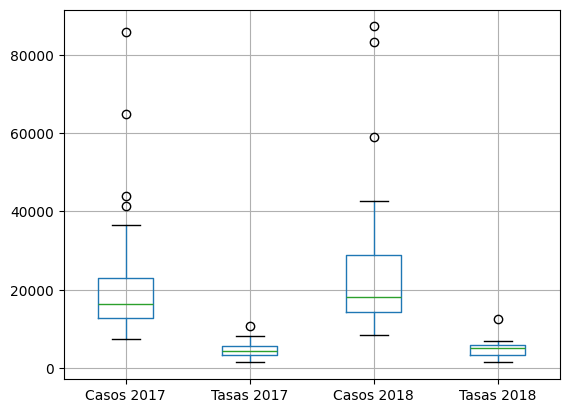

In [10]:
etas.boxplot();

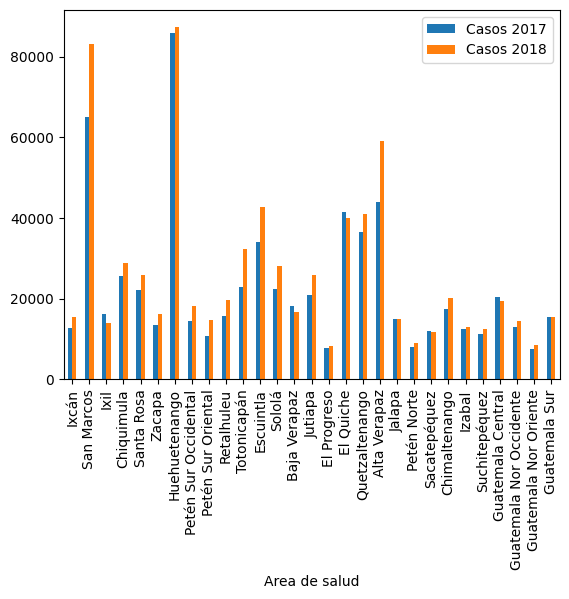

In [13]:
etas.plot(x = 'Area de salud', y = ['Casos 2017', 'Casos 2018'], kind = 'bar')
plt.show()